In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
import sys
pd.set_option('display.max_columns', None)



In [2]:
src_path = os.path.abspath(os.path.join(os.getcwd(), "../../../src"))
sys.path.append(src_path)
from pipeline import ModelPipeline


In [3]:
xgb_pipeline = ModelPipeline(dataset_path='/Users/abhitay/Developer/Columbia_projects/CAP/dsi-capstone-spring-2025-TD-anti-money-laundering/Code/Abhitay/IBM/Subset Transactions.csv')

xgb_pipeline.run_preprocessing()

xgb_pipeline.df

Running preprocessing pipeline...

Creating unique ids...

Normalizing currency...

Extracting time features...

Adding cyclical encoding to time feats...

Applying label encoding...

Label encoding applied to columns: ['day_of_week', 'from_bank', 'to_bank']

Applying one hot encoding...

/Users/abhitay/anaconda3/envs/def/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/abhitay/anaconda3/envs/def/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/Users/abhitay/anaconda3/envs/def/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/Users/abhitay/anaconda3/envs/def/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


One hot encoding applied to columns: ['payment_type', 'received_currency', 'sent_currency']

Extracting graph features...

Using default weight columns: ['sent_amount', 'received_amount']

Graph features computed using: ['sent_amount', 'received_amount']

**Note**, previously graph-based features were calculated using only `sent_amount` as edge weight (only based on 
outgoing transactions). Now both sent and received amounts are included by default.

New feature columns added: degree_centrality_sent_amount, degree_centrality_received_amount, 
pagerank_sent_amount, pagerank_received_amount

Preprocessing completed successfully!

{
    'renamed': True,
    'duplicates_removed': True,
    'unique_ids_created': True,
    'currency_normalized': True,
    'time_features_extracted': True,
    'cyclical_encoded': True,
    'weekend_encoded': True,
    'label_encoded': True,
    'neighbor_context_computed': True,
    'normalized': False,
    'onehot_encoded': True
}

,from_bank,to_bank,received_amount,sent_amount,is_laundering,from_account_id,to_account_id,from_account_idx,to_account_idx,sent_amount_usd,received_amount_usd,hour_of_day,day_of_week,seconds_since_midnight,timestamp_int,timestamp_scaled,day_sin,day_cos,time_of_day_sin,time_of_day_cos,is_weekend,received_currency_Australian Dollar,received_currency_Bitcoin,received_currency_Brazil Real,received_currency_Canadian Dollar,received_currency_Euro,received_currency_Mexican Peso,received_currency_Ruble,received_currency_Rupee,received_currency_Saudi Riyal,received_currency_Shekel,received_currency_Swiss Franc,received_currency_UK Pound,received_currency_US Dollar,received_currency_Yen,received_currency_Yuan,sent_currency_Australian Dollar,sent_currency_Bitcoin,sent_currency_Brazil Real,sent_currency_Canadian Dollar,sent_currency_Euro,sent_currency_Mexican Peso,sent_currency_Ruble,sent_currency_Rupee,sent_currency_Saudi Riyal,sent_currency_Shekel,sent_currency_Swiss Franc,sent_currency_UK Pound,sent_currency_US Dollar,sent_currency_Yen,sent_currency_Yuan,payment_type_ACH,payment_type_Bitcoin,payment_type_Cash,payment_type_Cheque,payment_type_Credit Card,payment_type_Reinvestment,payment_type_Wire,degree_centrality_sent_amount,pagerank_sent_amount,degree_centrality_received_amount,pagerank_received_amount
0,8,8,3697.340000,3697.340000,0,10_8000EBD30,10_8000EBD30,0,0,3.697340e+03,3.697340e+03,0,3,1200,1.661992e+09,1.661992e+09,0.433884,-0.900969,0.087156,0.996195,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000139,0.000050,0.000139,0.000050
1,109,0,0.010000,0.010000,0,3208_8000F4580,1_8000F5340,1,81239,1.000000e-02,1.000000e-02,0,3,1200,1.661992e+09,1.661992e+09,0.433884,-0.900969,0.087156,0.996195,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000019,0.000001,0.000019,0.000001
2,10,10,2806.970000,2806.970000,0,12_8000F5030,12_8000F5030,2,2,2.806970e+03,2.806970e+03,0,3,120,1.661991e+09,1.661991e+09,0.433884,-0.900969,0.008727,0.999962,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000195,0.000243,0.000195,0.000243
3,8,8,36682.970000,36682.970000,0,10_8000F5200,10_8000F5200,3,3,3.668297e+04,3.668297e+04,0,3,360,1.661991e+09,1.661991e+09,0.433884,-0.900969,0.026177,0.999657,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000121,0.000008,0.000121,0.000008
4,0,0,6162.440000,6162.440000,0,1_8000F5AD0,1_8000F5AD0,4,4,6.162440e+03,6.162440e+03,0,3,180,1.661991e+09,1.661991e+09,0.433884,-0.900969,0.013090,0.999914,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000177,0.000092,0.000177,0.000092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250896,4222,3797,0.000223,0.000223,0,152627_813D6AFF1,53744_814237D21,48362,48634,1.876695e-08,1.876695e-08,23,5,85260,1.662853e+09,1.662853e+09,-0.974928,-0.222521,-0.082808,0.996566,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000046,0.000007,0.000046,0.000007
1250897,4672,4671,0.417737,0.417737,0,254565_8147A3EC1,254355_8147A3E21,48834,75038,3.515537e-05,3.515537e-05,23,5,84720,1.662853e+09,1.662853e+09,-0.974928,-0.222521,-0.121869,0.992546,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [4]:
df = xgb_pipeline.df.copy()

df_majority = df[df['is_laundering'] == 0].sample(frac=0.5, random_state=42)
df_minority = df[df['is_laundering'] == 1]  # Keep all

df = pd.concat([df_majority, df_minority])


df["TxID"] = df.index

# Step 1: Prepare copies for joins
# Forward: receiver becomes sender
forward_df = df[['TxID', 'from_account_id', 'sent_amount_usd']].rename(
    columns={'TxID': 'forward_TxID',
             'from_account_id': 'receiver',
             'sent_amount_usd': 'forward_amount'}
)

# Backward: sender was receiver
backward_df = df[['TxID', 'to_account_id', 'sent_amount_usd']].rename(
    columns={'TxID': 'backward_TxID',
             'to_account_id': 'sender',
             'sent_amount_usd': 'backward_amount'}
)

# Step 2: Merge to get one-hop forward transactions (based on receiver)
df_forward = df.merge(forward_df, how='left', left_on='to_account_id', right_on='receiver')
# Remove self-join: keep rows with no match or where TxIDs differ
df_forward = df_forward[
    (df_forward['forward_TxID'].isna()) | (df_forward['TxID'] != df_forward['forward_TxID'])
]

# Step 3: Merge to get one-hop backward transactions (based on sender)
df_backward = df.merge(backward_df, how='left', left_on='from_account_id', right_on='sender')
df_backward = df_backward[
    (df_backward['backward_TxID'].isna()) | (df_backward['TxID'] != df_backward['backward_TxID'])
]

# Step 4: Aggregate
fwd_stats = df_forward.groupby('TxID')['forward_amount'].agg(['min', 'max', 'mean', 'std']).add_prefix('onehop_forward_')
bwd_stats = df_backward.groupby('TxID')['backward_amount'].agg(['min', 'max', 'mean', 'std']).add_prefix('onehop_backward_')

# Step 5: Merge back with original dataframe
df_final = df.set_index('TxID').join(fwd_stats).join(bwd_stats).reset_index()

df_final.head()


,TxID,from_bank,to_bank,received_amount,sent_amount,is_laundering,from_account_id,to_account_id,from_account_idx,to_account_idx,sent_amount_usd,received_amount_usd,hour_of_day,day_of_week,seconds_since_midnight,timestamp_int,timestamp_scaled,day_sin,day_cos,time_of_day_sin,time_of_day_cos,is_weekend,received_currency_Australian Dollar,received_currency_Bitcoin,received_currency_Brazil Real,received_currency_Canadian Dollar,received_currency_Euro,received_currency_Mexican Peso,received_currency_Ruble,received_currency_Rupee,received_currency_Saudi Riyal,received_currency_Shekel,received_currency_Swiss Franc,received_currency_UK Pound,received_currency_US Dollar,received_currency_Yen,received_currency_Yuan,sent_currency_Australian Dollar,sent_currency_Bitcoin,sent_currency_Brazil Real,sent_currency_Canadian Dollar,sent_currency_Euro,sent_currency_Mexican Peso,sent_currency_Ruble,sent_currency_Rupee,sent_currency_Saudi Riyal,sent_currency_Shekel,sent_currency_Swiss Franc,sent_currency_UK Pound,sent_currency_US Dollar,sent_currency_Yen,sent_currency_Yuan,payment_type_ACH,payment_type_Bitcoin,payment_type_Cash,payment_type_Cheque,payment_type_Credit Card,payment_type_Reinvestment,payment_type_Wire,degree_centrality_sent_amount,pagerank_sent_amount,degree_centrality_received_amount,pagerank_received_amount,onehop_forward_min,onehop_forward_max,onehop_forward_mean,onehop_forward_std,onehop_backward_min,onehop_backward_max,onehop_backward_mean,onehop_backward_std
0,1232933,22,57,16308.58,16308.58,0,28_80B758290,1132_80B763B00,71284,63679,344804.745562,344804.745562,15,5,54600,1.662823e+09,1.662823e+09,-0.974928,-0.222521,-0.737277,-0.675590,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000037,0.000004,0.000037,0.000004,2212.143579,1.323600e+07,4.149875e+06,5.602658e+06,2.545563e+05,1.860076e+06,7.274970e+05,636573.672092
1,578982,3747,4134,4105.47,4105.47,0,48097_8128EAB30,142574_8128EAEF0,29234,29220,3503.701960,3503.701960,5,0,19980,1.662356e+09,1.662356e+09,0.000000,1.000000,0.993068,0.117537,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000046,0.000001,0.000046,0.000001,684.214712,7.165458e+03,3.924836e+03,4.582931e+03,4.992524e+00,4.992524e+00,4.992524e+00,NaN
2,1038519,17,17,2669.26,2669.26,0,22_800E03FB0,22_800E04000,20296,49404,2278.007511,2278.007511,0,4,240,1.662682e+09,1.662682e+09,-0.433884,-0.900969,0.017452,0.999848,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000046,0.000002,0.000046,0.000002,NaN,NaN,NaN,NaN,3.737139e+01,4.229862e+03,1.218265e+03,1887.820332
3,55879,41,41,18.49,18.49,0,214_8097014C0,214_8097014C0,39634,39634,24.398599,24.398599,0,3,1560,1.661992e+09,1.661992e+09,0.433884,-0.900969,0.113203,0.993572,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000056,0.000010,0.000056,0.000010,194.053972,3.138565e+02,2.625126e+02,6.403715e+01,2.863437e+01,4.625164e+03,1.192262e+03,2288.642126
4,38248,3836,603,14.24,14.24,0,112354_80B323490,14650_80189A690,26993,22253,12.152742,12.152742,0,3,360,1.661991e+09,1.661991e+09,0.433884,-0.900969,0.026177,0.999657,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000046,0.000010,0.000046,0.000010,7.023670,4.975673e+04,1.573743e+04,1.966759e+04,7.719346e+06,7.719346e+06,7.719346e+06,NaN


In [5]:
df_final.to_csv('fileweek11_50%.csv', index=False)

In [6]:
xgb_pipeline.df = df_final.copy()

In [7]:
# X = ['from_bank','to_bank','received_amount', 'received_currency','sent_amount','sent_currency','payment_type','sent_amount_usd'
#      ,'received_amount_usd','hour_of_day','day_of_week','seconds_since_midnight','timestamp_int','timestamp_scaled'
#      ,'day_sin','day_cos','time_of_day_sin','time_of_day_cos','is_weekend','degree_centrality_sent_amount','pagerank_sent_amount'
#      ,'degree_centrality_received_amount','pagerank_received_amount','onehop_forward_min', 'onehop_forward_max', 'onehop_forward_mean' 
#      ,'onehop_forward_std', 'onehop_backward_min', 'onehop_backward_max', 'onehop_backward_mean', 'onehop_backward_std']


X1 = xgb_pipeline.df.columns
X_remove = ['TxID', 'is_laundering','from_account_id',	'to_account_id','from_account_idx','to_account_idx']

X = [x for x in X1 if x not in X_remove]

y = 'is_laundering'


In [8]:
X

['from_bank',
 'to_bank',
 'received_amount',
 'sent_amount',
 'sent_amount_usd',
 'received_amount_usd',
 'hour_of_day',
 'day_of_week',
 'seconds_since_midnight',
 'timestamp_int',
 'timestamp_scaled',
 'day_sin',
 'day_cos',
 'time_of_day_sin',
 'time_of_day_cos',
 'is_weekend',
 'received_currency_Australian Dollar',
 'received_currency_Bitcoin',
 'received_currency_Brazil Real',
 'received_currency_Canadian Dollar',
 'received_currency_Euro',
 'received_currency_Mexican Peso',
 'received_currency_Ruble',
 'received_currency_Rupee',
 'received_currency_Saudi Riyal',
 'received_currency_Shekel',
 'received_currency_Swiss Franc',
 'received_currency_UK Pound',
 'received_currency_US Dollar',
 'received_currency_Yen',
 'received_currency_Yuan',
 'sent_currency_Australian Dollar',
 'sent_currency_Bitcoin',
 'sent_currency_Brazil Real',
 'sent_currency_Canadian Dollar',
 'sent_currency_Euro',
 'sent_currency_Mexican Peso',
 'sent_currency_Ruble',
 'sent_currency_Rupee',
 'sent_currency_

In [9]:

X_train, X_val, X_test, y_train, y_val, y_test = xgb_pipeline.split_train_test_val(X,y)


Data split using random_stratified method.

In [10]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score
import shap
import matplotlib.pyplot as plt

# Train XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    use_label_encoder=False,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

model.fit(X_train, y_train,
          early_stopping_rounds=10,
          eval_set=[(X_val, y_val)],
          verbose=True)

# Evaluate model on test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")


/Users/abhitay/anaconda3/envs/def/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/abhitay/anaconda3/envs/def/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.35426
[1]	validation_0-aucpr:0.35961
[2]	validation_0-aucpr:0.37325
[3]	validation_0-aucpr:0.39053
[4]	validation_0-aucpr:0.39142
[5]	validation_0-aucpr:0.39556
[6]	validation_0-aucpr:0.39865
[7]	validation_0-aucpr:0.39933
[8]	validation_0-aucpr:0.40018
[9]	validation_0-aucpr:0.40250
[10]	validation_0-aucpr:0.40353
[11]	validation_0-aucpr:0.40893
[12]	validation_0-aucpr:0.41161
[13]	validation_0-aucpr:0.41980
[14]	validation_0-aucpr:0.42461
[15]	validation_0-aucpr:0.42707
[16]	validation_0-aucpr:0.43002
[17]	validation_0-aucpr:0.44270
[18]	validation_0-aucpr:0.44712
[19]	validation_0-aucpr:0.45032
[20]	validation_0-aucpr:0.45987
[21]	validation_0-aucpr:0.46247
[22]	validation_0-aucpr:0.46600
[23]	validation_0-aucpr:0.46766
[24]	validation_0-aucpr:0.47005
[25]	validation_0-aucpr:0.47109
[26]	validation_0-aucpr:0.47250
[27]	validation_0-aucpr:0.47387
[28]	validation_0-aucpr:0.47502
[29]	validation_0-aucpr:0.47819
[30]	validation_0-aucpr:0.48493
[31]	validation_0-

[33]	validation_0-aucpr:0.49187
[34]	validation_0-aucpr:0.49300
[35]	validation_0-aucpr:0.49657
[36]	validation_0-aucpr:0.49731
[37]	validation_0-aucpr:0.50015
[38]	validation_0-aucpr:0.50143
[39]	validation_0-aucpr:0.50128
[40]	validation_0-aucpr:0.50154
[41]	validation_0-aucpr:0.50222
[42]	validation_0-aucpr:0.50499
[43]	validation_0-aucpr:0.50763
[44]	validation_0-aucpr:0.50945
[45]	validation_0-aucpr:0.51144
[46]	validation_0-aucpr:0.51517
[47]	validation_0-aucpr:0.51842
[48]	validation_0-aucpr:0.51840
[49]	validation_0-aucpr:0.51872
[50]	validation_0-aucpr:0.52143
[51]	validation_0-aucpr:0.52220
[52]	validation_0-aucpr:0.52452
[53]	validation_0-aucpr:0.52579
[54]	validation_0-aucpr:0.52739
[55]	validation_0-aucpr:0.52931
[56]	validation_0-aucpr:0.53147
[57]	validation_0-aucpr:0.53292
[58]	validation_0-aucpr:0.53574
[59]	validation_0-aucpr:0.53775
[60]	validation_0-aucpr:0.53901
[61]	validation_0-aucpr:0.53913
[62]	validation_0-aucpr:0.54020
[63]	validation_0-aucpr:0.54226
[64]	val

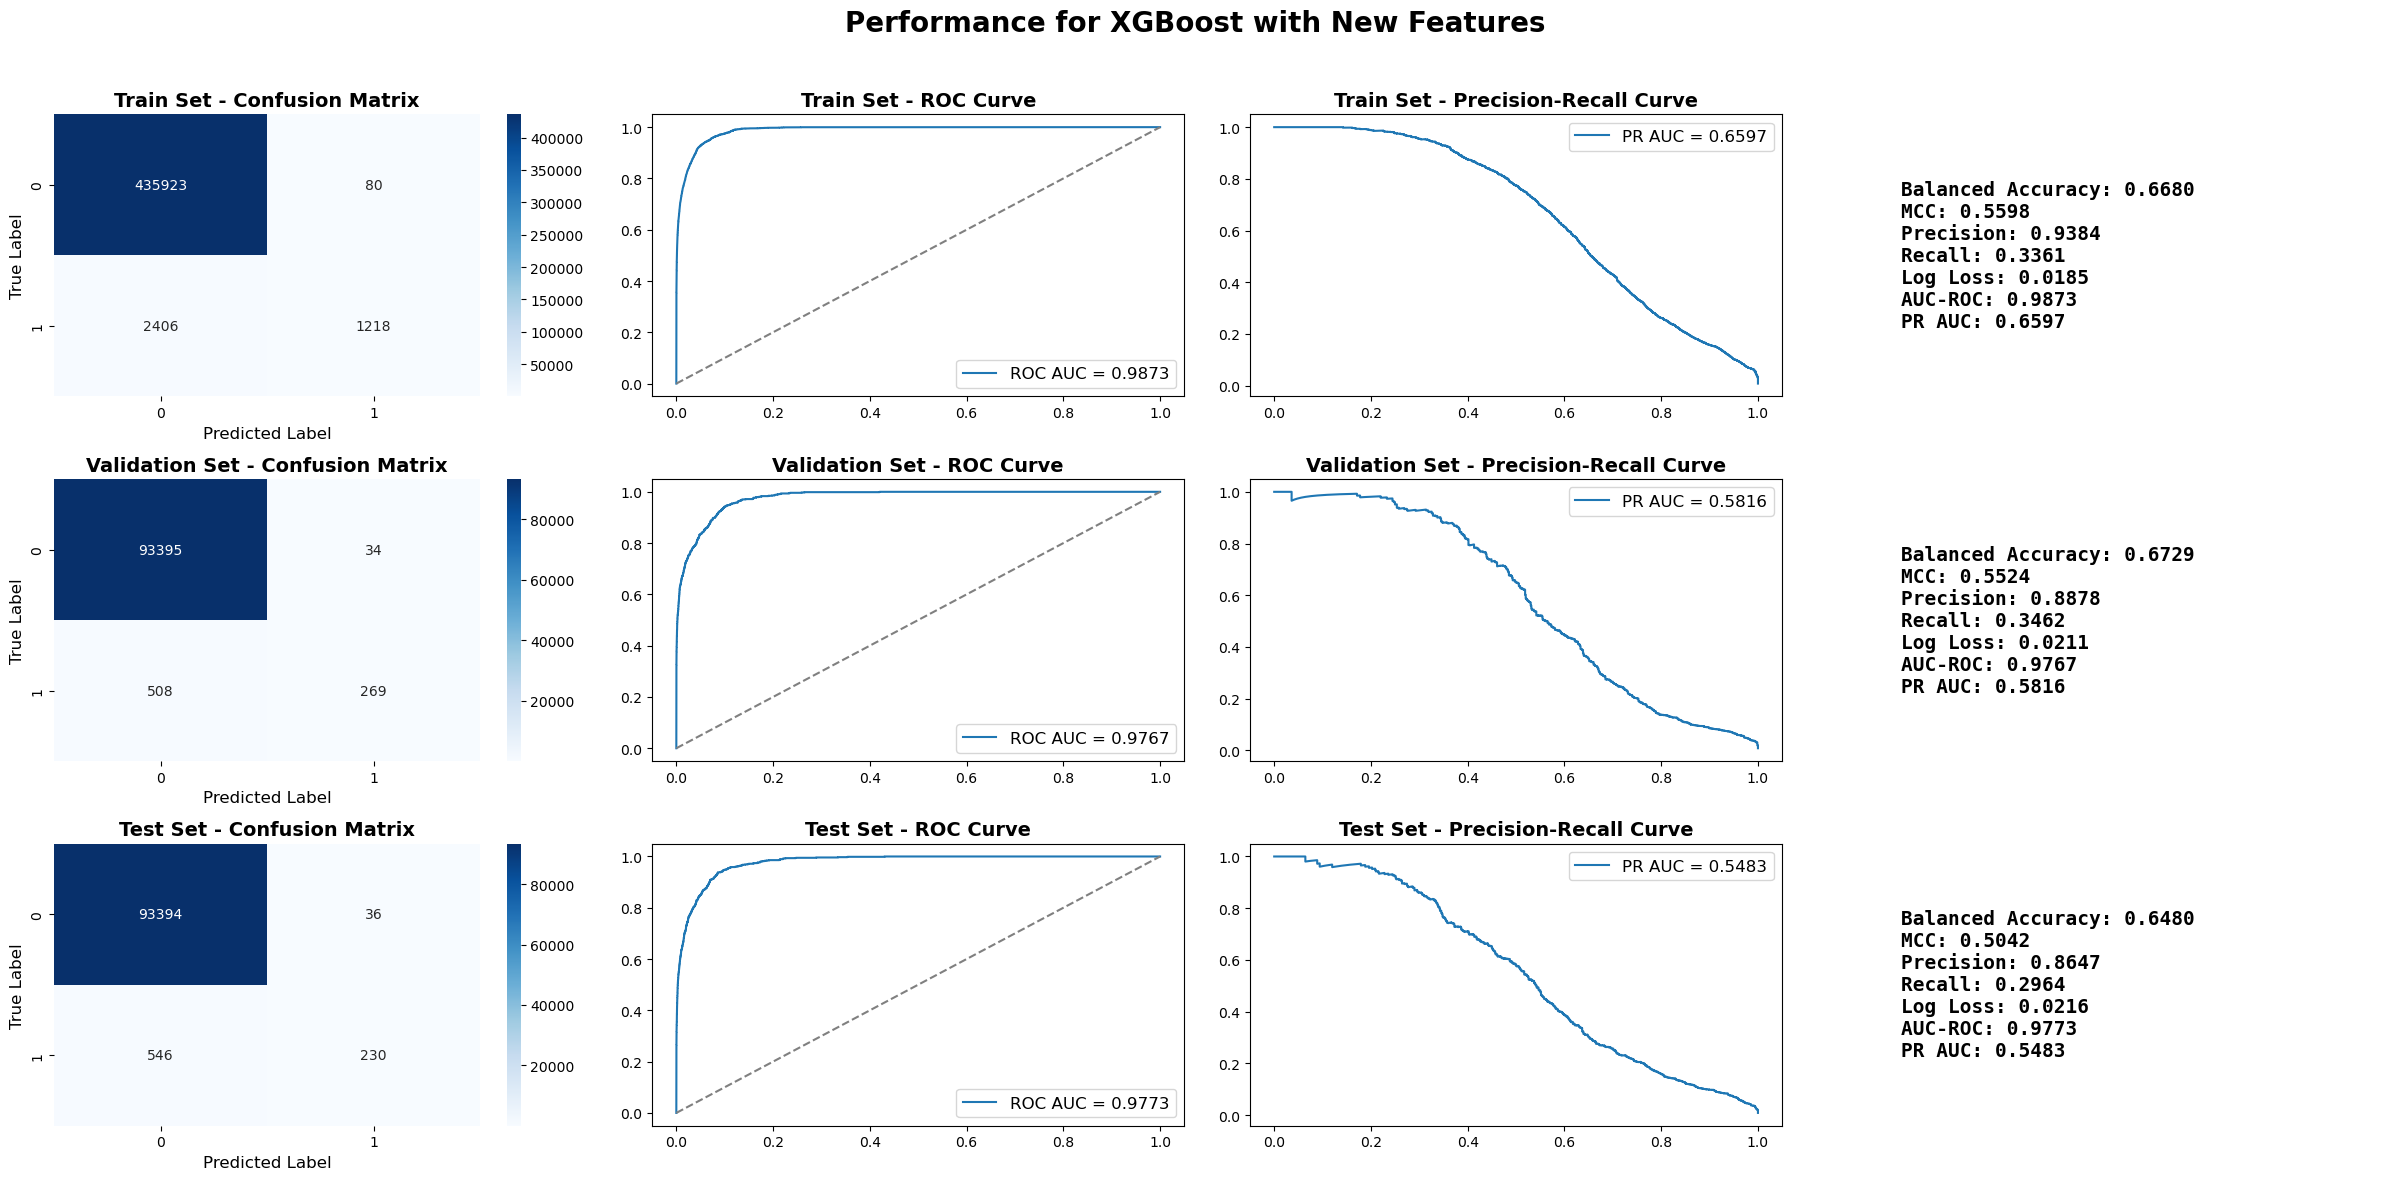

In [11]:
# Train predictions
train_proba = model.predict_proba(X_train)[:, 1]  # Get probability of class 1
train_pred = (train_proba > 0.5).astype(int)

# Validation predictions
val_proba = model.predict_proba(X_val)[:, 1]
val_pred = (val_proba > 0.5).astype(int)

# Test predictions
test_proba = model.predict_proba(X_test)[:, 1]
test_pred = (test_proba > 0.5).astype(int)


# Evaluate Model Performance
slide_title = "Performance for XGBoost with New Features"
metrics_summary = xgb_pipeline.result_metrics(
    slide_title,
    y_train, train_pred, train_proba,
    y_val, val_pred, val_proba,
    y_test, test_pred, test_proba,
    class_labels=["Licit", "Illicit"]
)


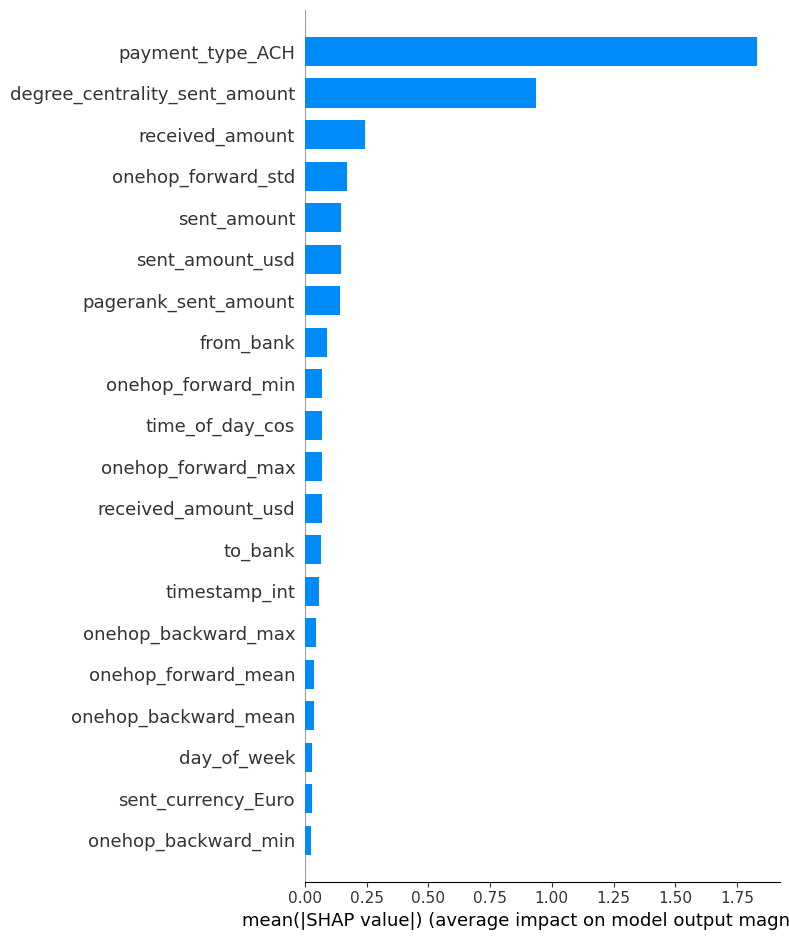

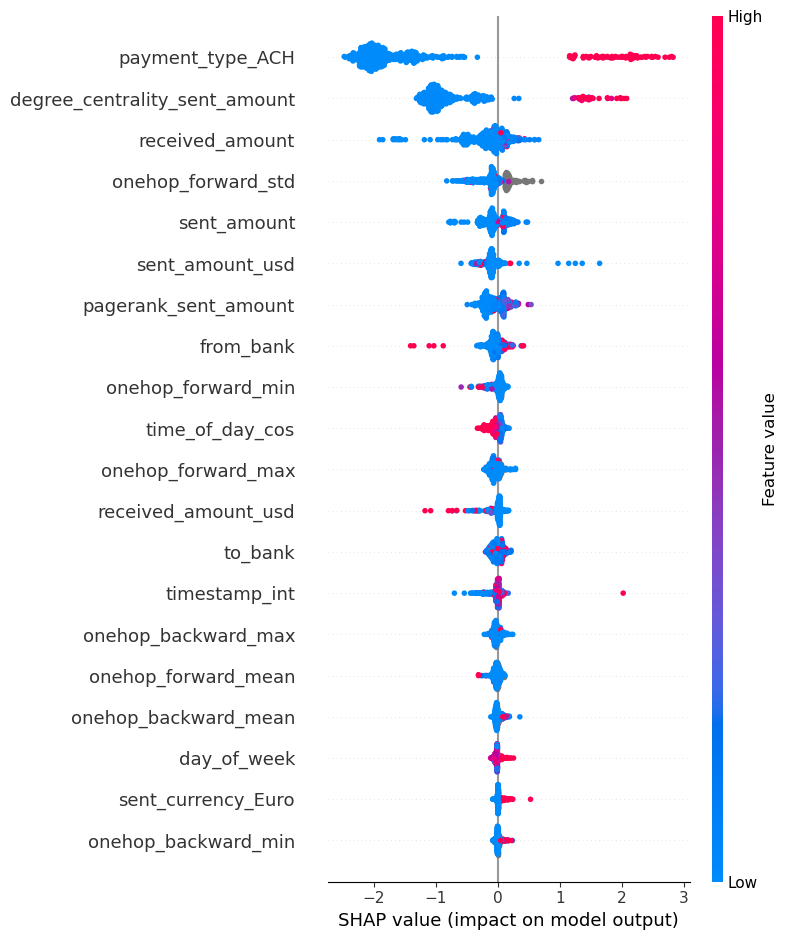

In [12]:
X_train = X_train.sample(n=500, random_state=42)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap_inter = explainer.shap_interaction_values(X_train)


# Summary Plot (Global Feature Importance)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Optional: Summary dot plot (per-sample contribution)
shap.summary_plot(shap_values, X_train)

In [13]:
shap_values

array([[ 1.5254354e-01, -6.4332895e-02,  6.6109794e-01, ...,
        -2.2606846e-02, -5.3902544e-02,  2.1052387e-02],
       [-4.8733787e-03, -9.9475525e-02,  8.3445691e-02, ...,
         1.4923801e-01,  1.6469570e-02,  5.2810736e-02],
       [ 3.2769151e-02,  1.5897697e-03,  1.3657814e-01, ...,
        -4.1329104e-02,  7.6829843e-02, -5.7514701e-03],
       ...,
       [-4.7564320e-02,  7.6531149e-02, -5.8134362e-02, ...,
        -2.4231285e-02, -3.3114638e-02,  2.0522477e-02],
       [-3.5329040e-02,  8.7019727e-02,  3.7032027e-02, ...,
        -6.0895119e-02,  1.6081939e-02,  3.8682425e-03],
       [ 3.8885128e-02,  1.4043902e-03, -1.4903164e+00, ...,
         1.1639750e-01, -7.4678183e-02,  1.4375267e-02]], dtype=float32)

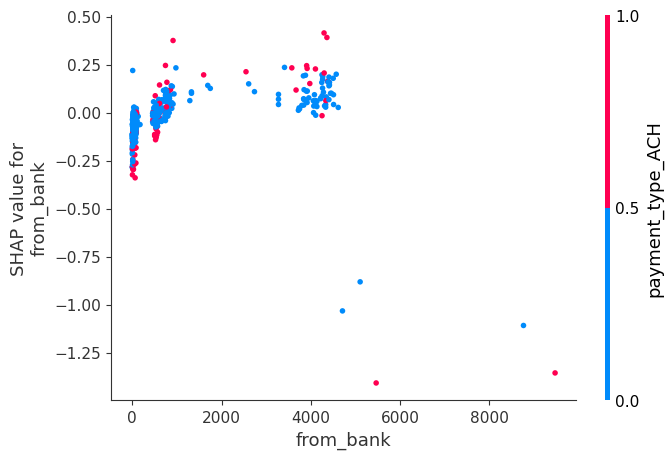

In [15]:
shap.dependence_plot("from_bank", shap_values, X_train)

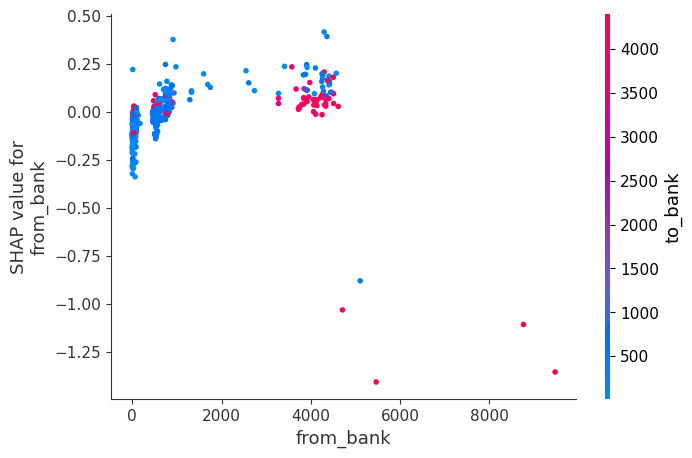

In [16]:
shap.dependence_plot("from_bank", shap_values, X_train, interaction_index="to_bank")


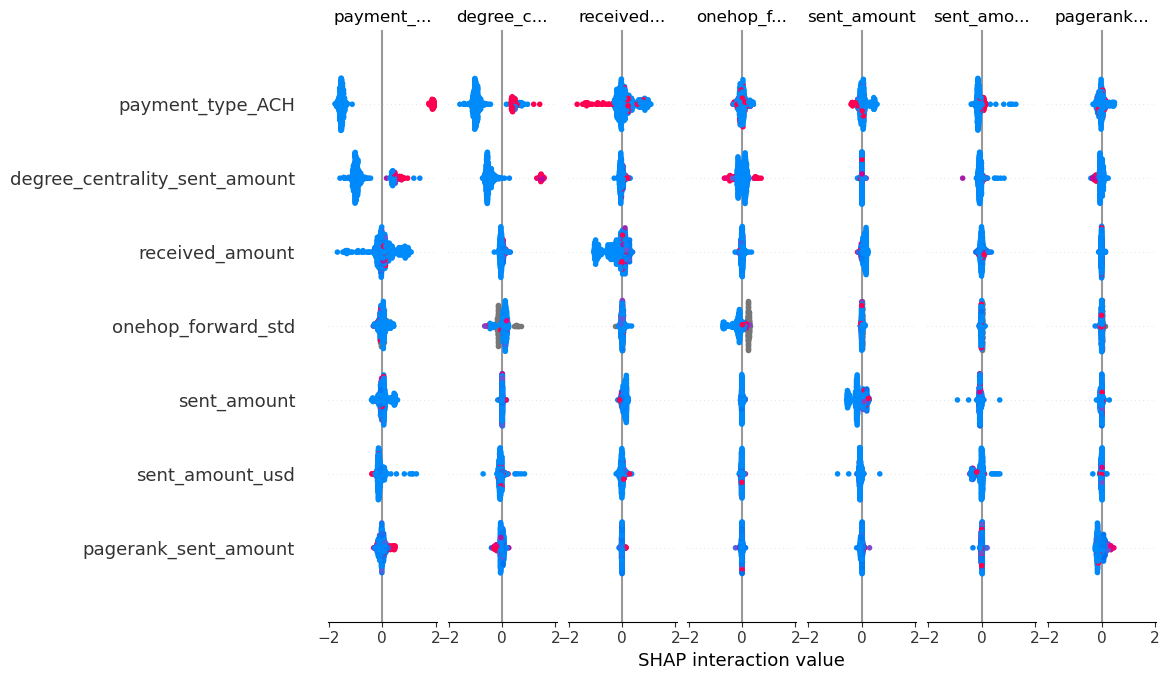

In [17]:
shap_interaction_values = explainer.shap_interaction_values(X_train)
shap.summary_plot(shap_interaction_values, X_train)


In [18]:
shap.plots.waterfall(shap_values[0])


TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

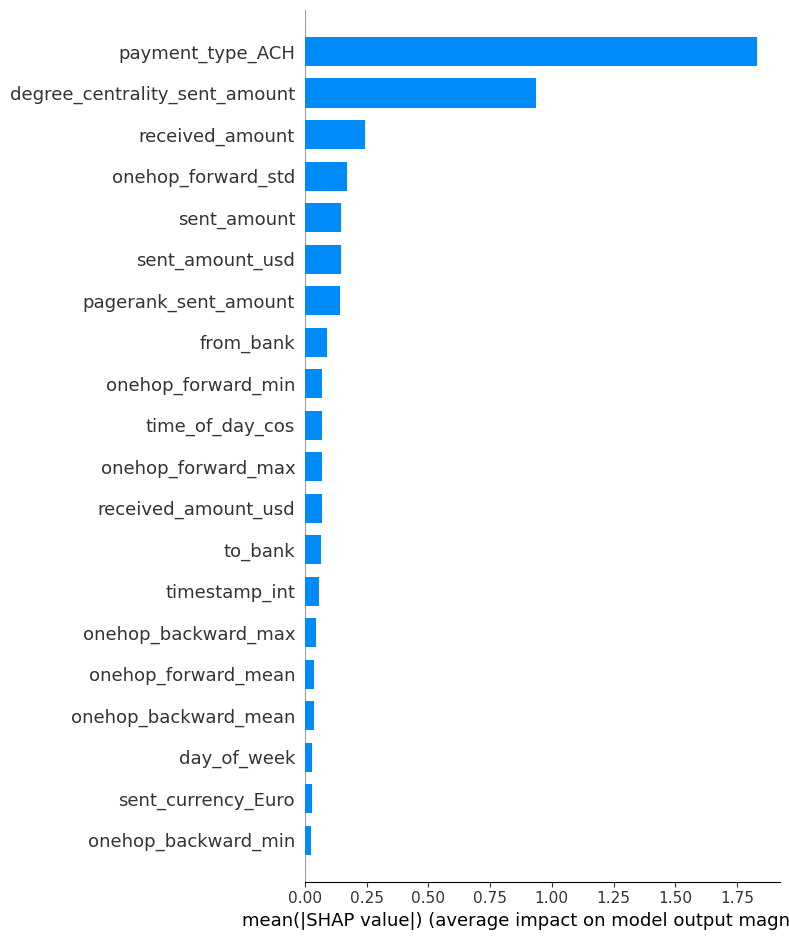

In [19]:
shap.summary_plot(shap_values, X_train, plot_type="bar")


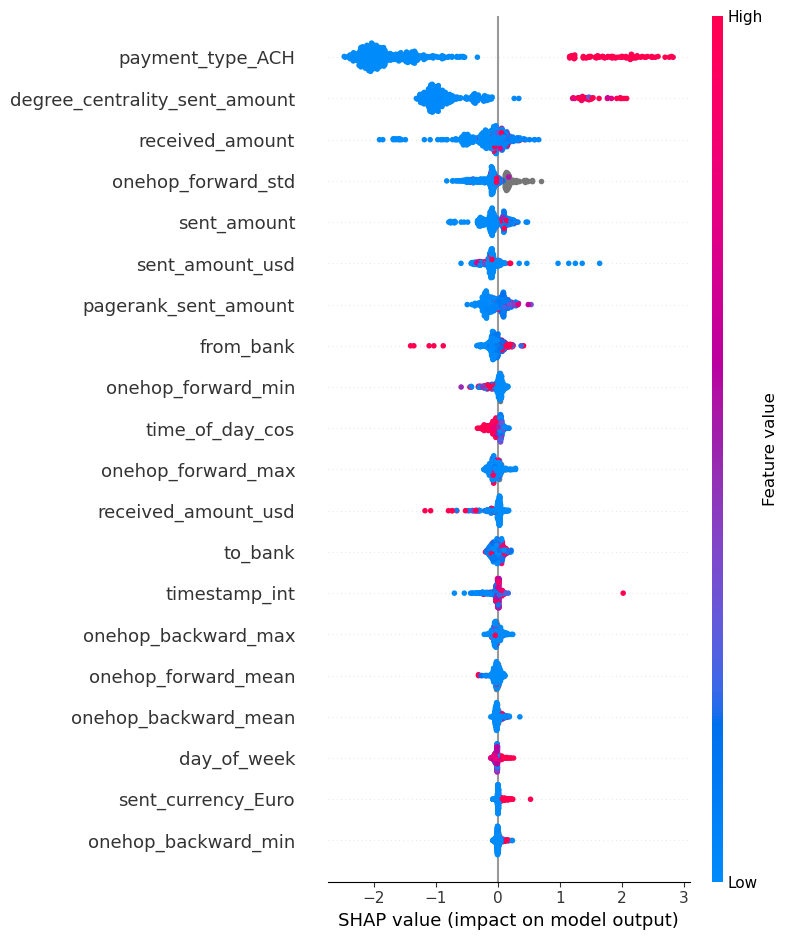

In [20]:
shap.summary_plot(shap_values, X_train)


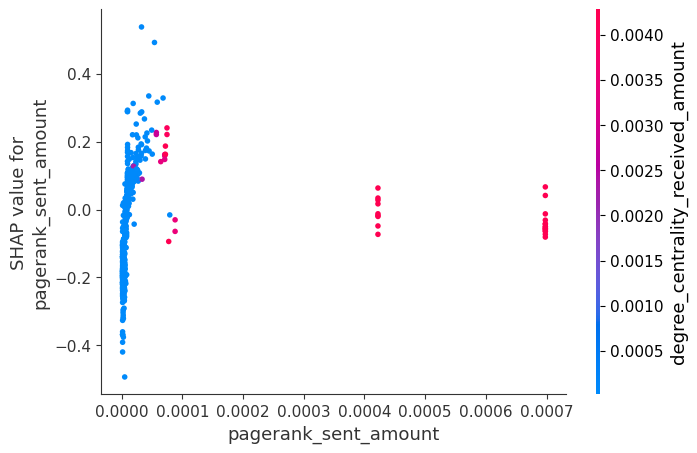

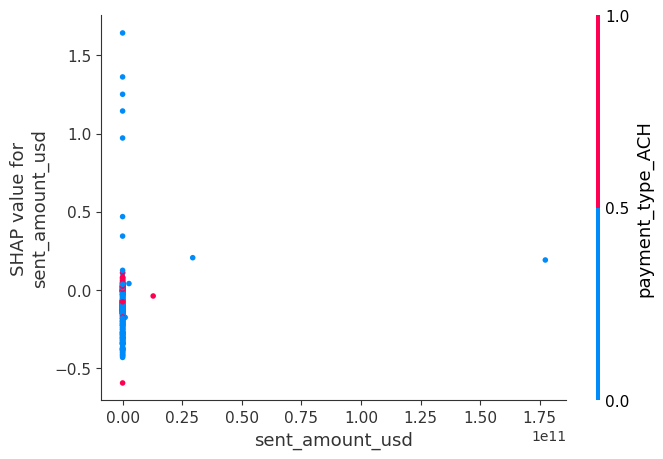

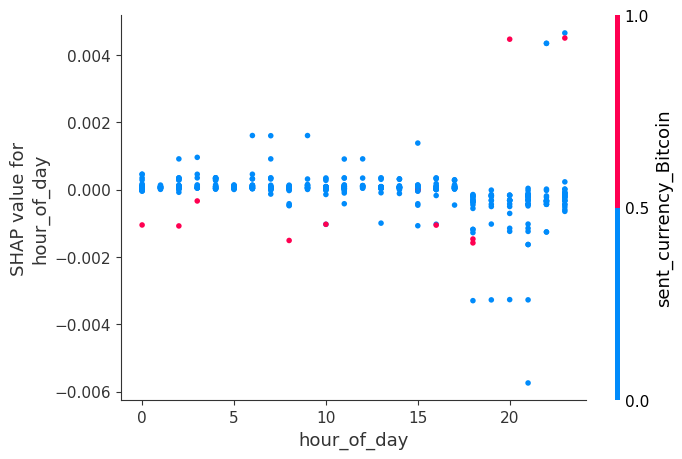

In [22]:
shap.dependence_plot("pagerank_sent_amount", shap_values, X_train)
shap.dependence_plot("sent_amount_usd", shap_values, X_train)
shap.dependence_plot("hour_of_day", shap_values, X_train)


In [25]:
network_feats = [f for f in X_train.columns if 'pagerank' in f or 'centrality' in f or 'onehop' in f]
time_feats = [f for f in X_train.columns if 'hour' in f or 'day' in f or 'timestamp' in f]
currency_feats = [f for f in X_train.columns if 'currency' in f]
amount_feats = ['sent_amount', 'received_amount', 'sent_amount_usd', 'received_amount_usd']
payment_type_feats = [f for f in X_train.columns if 'payment_type' in f]

import numpy as np

# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)

for group_name, feature_list in {
    'Network': network_feats,
    'Time': time_feats,
    'Currency': currency_feats,
    'Amount': amount_feats,
    'Payment Type': payment_type_feats,
}.items():
    mean_impact = np.abs(shap_df[feature_list]).values.mean()
    print(f"{group_name}: {mean_impact:.4f}")



Network: 0.1297
Time: 0.0231
Currency: 0.0035
Amount: 0.1499
Payment Type: 0.2637


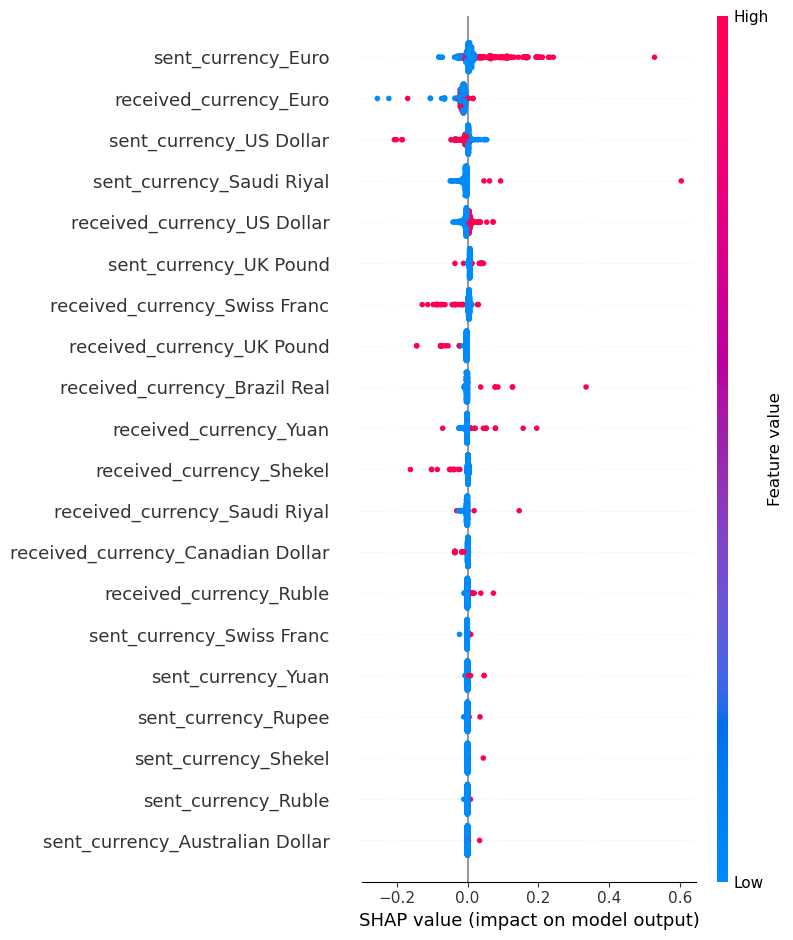

In [31]:
shap.summary_plot(shap_df[currency_feats].values, X_train[currency_feats])


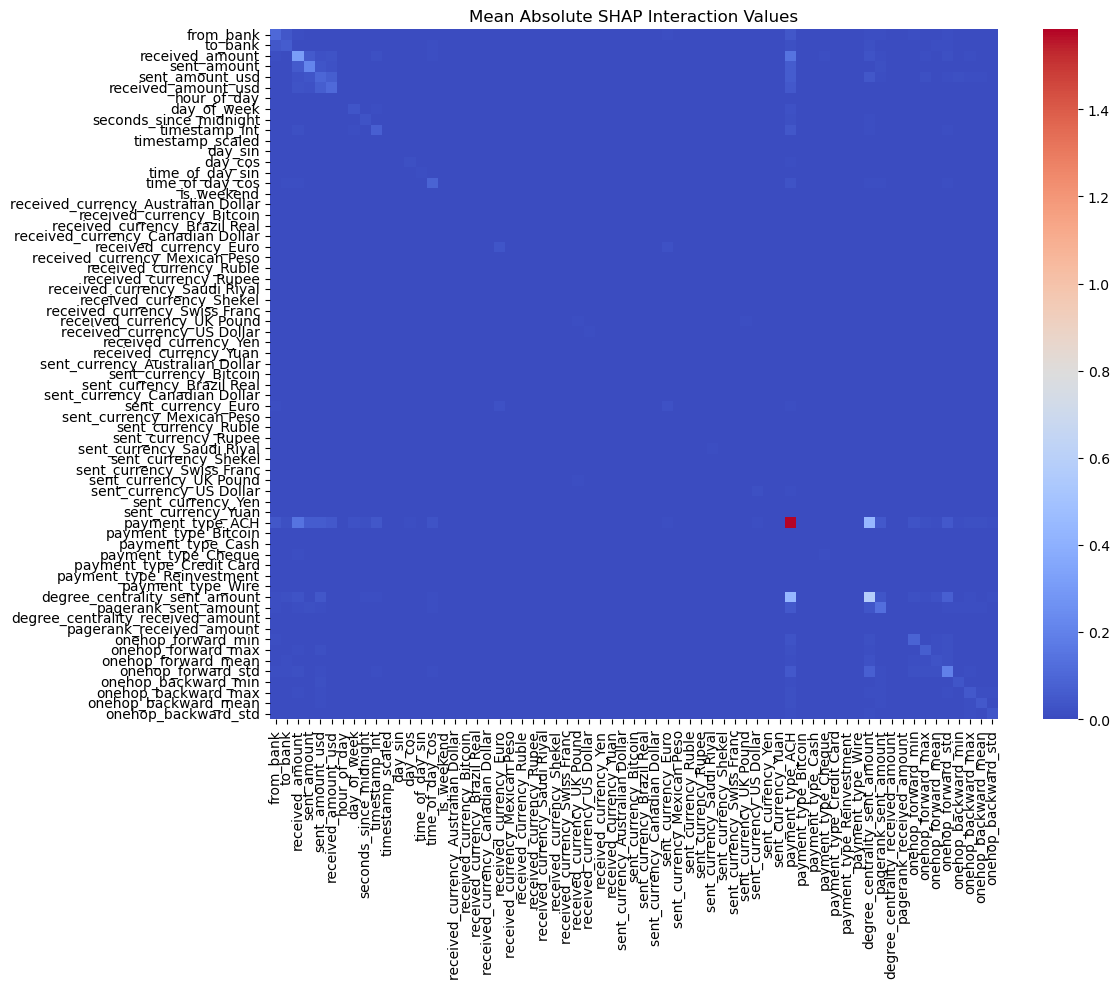

In [32]:
import shap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate interaction values
shap_interaction_values = explainer.shap_interaction_values(X_train)

# Average absolute interaction values
interaction_matrix = np.abs(shap_interaction_values).mean(axis=0)

# Make it a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(interaction_matrix, 
            xticklabels=X_train.columns, 
            yticklabels=X_train.columns,
            cmap="coolwarm", 
            annot=False, 
            fmt=".2f")
plt.title("Mean Absolute SHAP Interaction Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


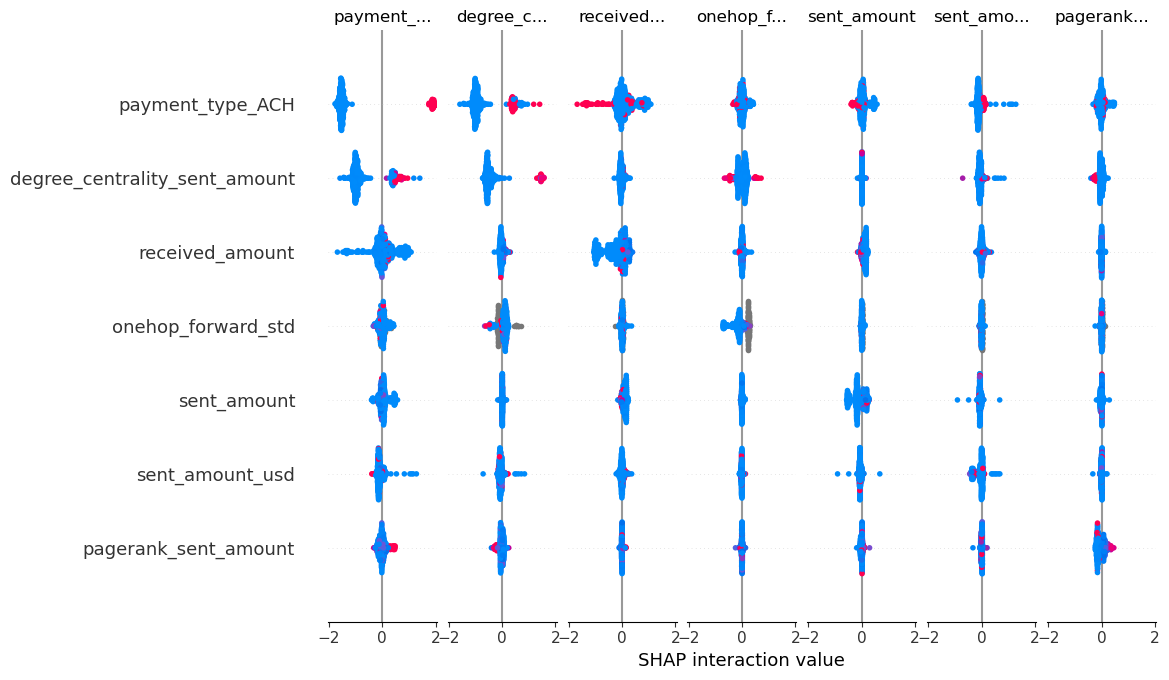

In [34]:
shap.summary_plot(shap_interaction_values, X_train, plot_type="layered_violin")


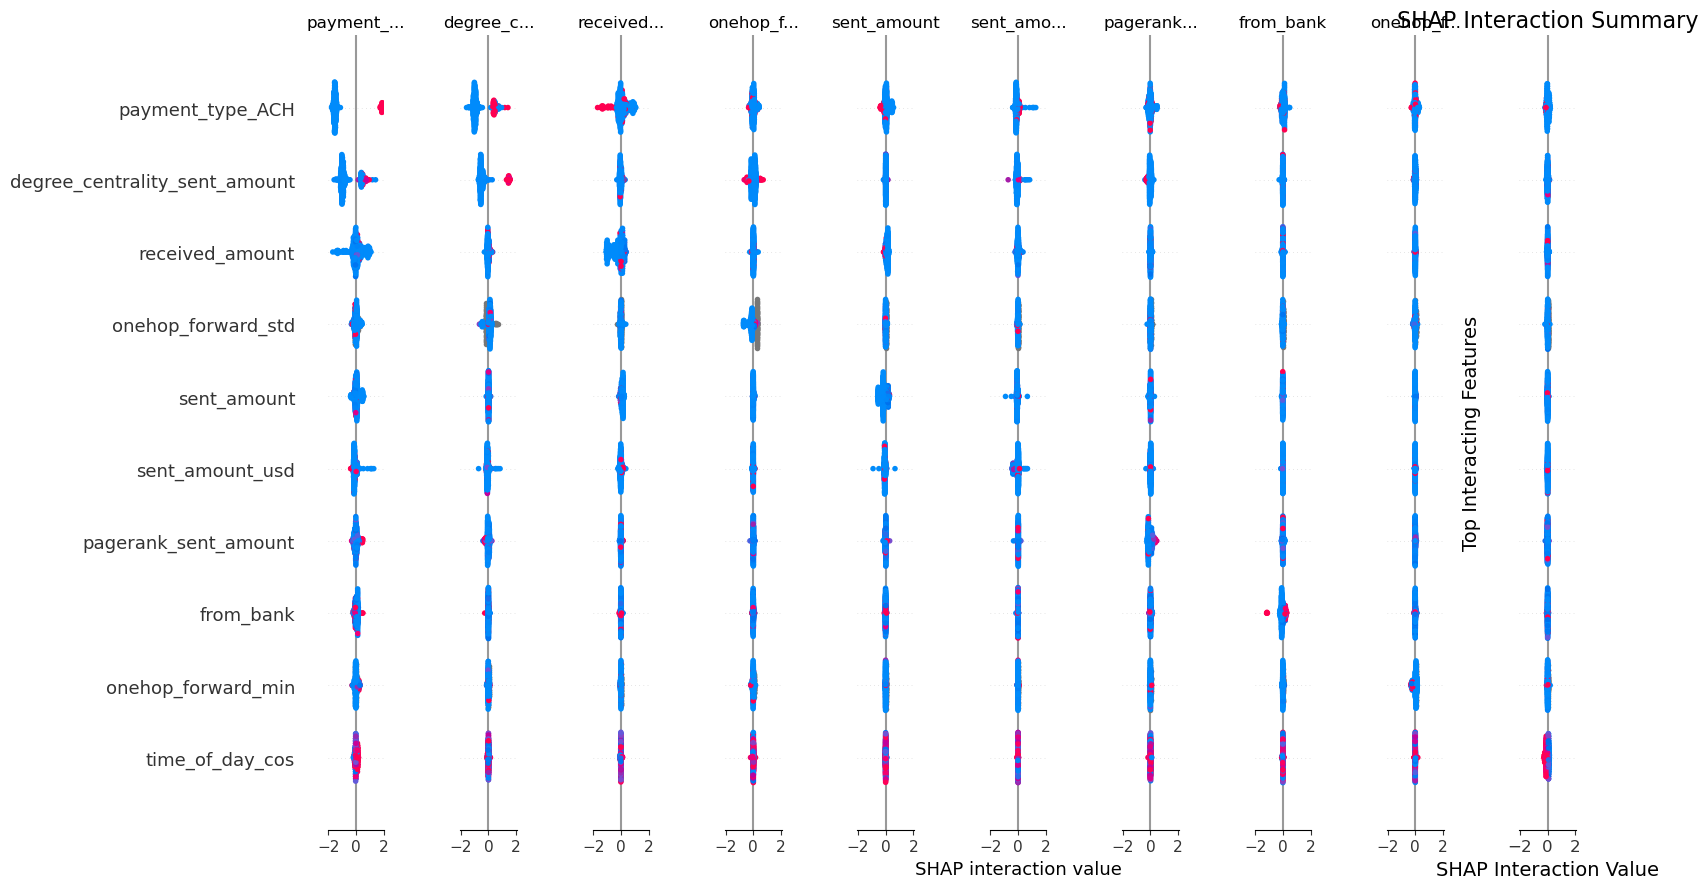

In [35]:
import shap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# SHAP interaction plot
shap.summary_plot(
    shap_interaction_values, 
    X_train, 
    plot_type="dot",  # this is the default, showing interaction dots
    max_display=10,   # you can increase this to show more rows if needed
    show=False
)

# Make plot more readable
plt.title("SHAP Interaction Summary", fontsize=16)
plt.xlabel("SHAP Interaction Value", fontsize=14)
plt.ylabel("Top Interacting Features", fontsize=14)

# Rotate x-axis tick labels (horizontal) if needed
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


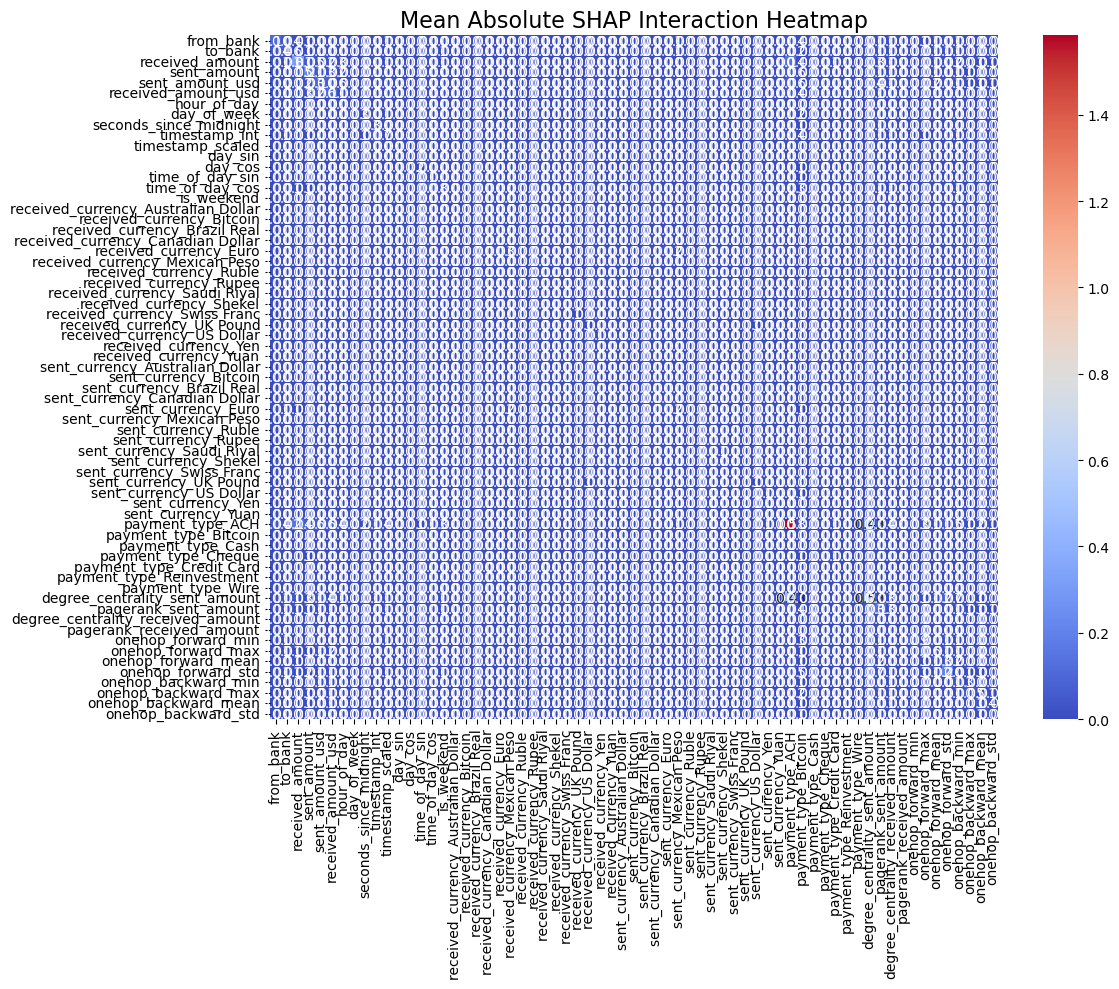

In [36]:
# Mean absolute interaction values
interaction_matrix = np.abs(shap_interaction_values).mean(axis=0)

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(interaction_matrix, 
            xticklabels=X_train.columns, 
            yticklabels=X_train.columns,
            cmap="coolwarm", 
            annot=True, fmt=".2f")
plt.title("Mean Absolute SHAP Interaction Heatmap", fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
